# Installing Tensorflow

In [45]:
!python --version

Python 3.7.8


In [46]:
 # !pip install tensorflow

In [47]:
#!pip install tensorflow==2.0

In [48]:
#!pip install --ignore-installed --upgrade tensorflow==2.0

In [49]:
import tensorflow as tf
tf.__version__

'2.6.0'

# Keras Syntax Basics

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [51]:
#from google.colab import drive
#drive.mount('/content/drive')

In [52]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [53]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [54]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


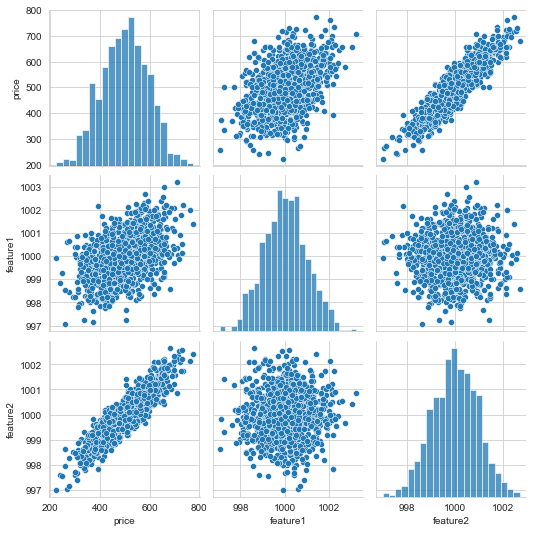

In [57]:
sns.pairplot(df);

In [58]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

# öncekilerden farklı olarak value değerlerini aldık.
# .values bize array verir.
# demek ki deep learning modelleri bizden array bekliyor.

In [61]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [62]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [64]:
X_train.shape

(700, 2)

In [65]:
X_test.shape

(300, 2)

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
X_train.max()

1.0

In [71]:
X_train.min()

0.0

In [72]:
X_test.max()

1.0186515935232023

In [73]:
X_test.min()

-0.014108392024525074

## Modelling

In [74]:
import tensorflow as tf

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [76]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evaluation method (since it isn't yet buil

In [77]:
help(Dense)



Help on class Dense in module keras.layers.core:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-t

In [78]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),  # layerlarda kaç nöron olmasını istiyorum ve bu nöronda hangi aktivasyon fonksiyonu çalışsın bunları belirledim.
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

# layerların arka arkaya konulmasını sağlayan fonksiyon bu.

In [79]:
# Second way to create model (recommended) kullanım kolaylığı ve esneklik açısından .add() kullanarak layerları oluşturuyoruz.

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1] or input_shape = X_train.shape --> bu input layer oluşturmak için. 
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [80]:
X_train.shape[1]

2

In [81]:
model.compile(optimizer = "rmsprop", loss = "mse")

# modelimin içinde çalışacak optimizer ve loss function'ı belirledim.

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [82]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

# bir epoch ta 700 satır olduğu için ve batch_size 32 olduğu için 700/32 = 22 iterasyonda datayı tamamlıyor. 

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256713.6875
Epoch 2/250
22/22 [==============================] - 0s 857us/step - loss: 256689.4219
Epoch 3/250
22/22 [==============================] - 0s 905us/step - loss: 256667.3438
Epoch 4/250
22/22 [==============================] - 0s 952us/step - loss: 256645.4375
Epoch 5/250
22/22 [==============================] - 0s 905us/step - loss: 256623.5000
Epoch 6/250
22/22 [==============================] - 0s 857us/step - loss: 256601.5938
Epoch 7/250
22/22 [==============================] - 0s 857us/step - loss: 256579.7656
Epoch 8/250
22/22 [==============================] - 0s 905us/step - loss: 256557.8906
Epoch 9/250
22/22 [==============================] - 0s 810us/step - loss: 256535.9062
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 256514.0625
Epoch 11/250
22/22 [==============================] - 0s 809us/step - loss: 256492.2344
Epoch 12/250
22/22 [=========================

22/22 [==============================] - 0s 762us/step - loss: 254679.0156
Epoch 95/250
22/22 [==============================] - 0s 952us/step - loss: 254657.2188
Epoch 96/250
22/22 [==============================] - 0s 816us/step - loss: 254635.4062
Epoch 97/250
22/22 [==============================] - 0s 809us/step - loss: 254613.5469
Epoch 98/250
22/22 [==============================] - 0s 857us/step - loss: 254591.8125
Epoch 99/250
22/22 [==============================] - 0s 809us/step - loss: 254569.9375
Epoch 100/250
22/22 [==============================] - 0s 857us/step - loss: 254548.1094
Epoch 101/250
22/22 [==============================] - 0s 857us/step - loss: 254526.3594
Epoch 102/250
22/22 [==============================] - 0s 809us/step - loss: 254504.6406
Epoch 103/250
22/22 [==============================] - 0s 809us/step - loss: 254482.8281
Epoch 104/250
22/22 [==============================] - 0s 809us/step - loss: 254460.9531
Epoch 105/250
22/22 [===================

22/22 [==============================] - 0s 809us/step - loss: 252676.9531
Epoch 187/250
22/22 [==============================] - 0s 857us/step - loss: 252655.2656
Epoch 188/250
22/22 [==============================] - 0s 810us/step - loss: 252633.5156
Epoch 189/250
22/22 [==============================] - 0s 810us/step - loss: 252611.7656
Epoch 190/250
22/22 [==============================] - 0s 905us/step - loss: 252590.1094
Epoch 191/250
22/22 [==============================] - 0s 857us/step - loss: 252568.4062
Epoch 192/250
22/22 [==============================] - 0s 809us/step - loss: 252546.7031
Epoch 193/250
22/22 [==============================] - 0s 762us/step - loss: 252525.0312
Epoch 194/250
22/22 [==============================] - 0s 762us/step - loss: 252503.3125
Epoch 195/250
22/22 [==============================] - 0s 857us/step - loss: 252481.5781
Epoch 196/250
22/22 [==============================] - 0s 810us/step - loss: 252459.8125
Epoch 197/250
22/22 [==============

In [83]:
model.summary()

# her bir giriş nöronundan layer1 e birer ağırlık değeri giriyor ( 2x4 =8) 
# Buna ilave bir de layer1 in her nöronunda birer bias değeri var (4) 
# 8 + 4 = 12 (birinci satırın sonunda gösterilen param adedi)
# toplamda bir iterasyonda güncellenen parametre sayısı 57.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


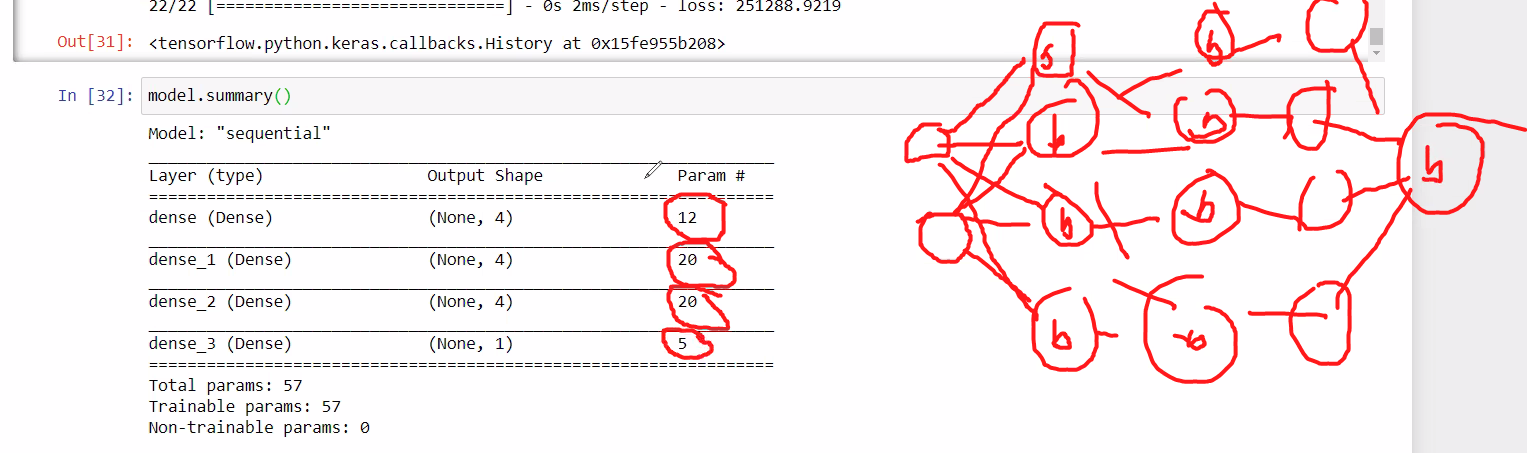

In [84]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.20779365, -0.5932894 ,  0.8077305 , -0.02341968],
        [ 0.3888707 , -0.40712667,  0.2994237 ,  0.5825448 ]],
       dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.01530091,  0.        , -0.01515823,  0.00564756], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.4717951 , -0.6379005 , -0.49492222, -0.44428816],
        [-0.42580357, -0.21522373, -0.28211635, -0.85420376],
        [ 0.16181657,  0.5015391 , -0.71365356, -0.51801205],
        [-0.5543199 , -0.8297011 , -0.20823634,  0.46868807]],
       dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.01530216, -0.01525253,  0.        ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_14/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.65980566, -0.72198176, -0.21941233, -0.49241352],
        [ 0.8347859 , -0.69

In [85]:
model.history.history

{'loss': [256713.6875,
  256689.421875,
  256667.34375,
  256645.4375,
  256623.5,
  256601.59375,
  256579.765625,
  256557.890625,
  256535.90625,
  256514.0625,
  256492.234375,
  256470.328125,
  256448.4375,
  256426.515625,
  256404.6875,
  256382.703125,
  256360.875,
  256339.015625,
  256317.09375,
  256295.25,
  256273.375,
  256251.453125,
  256229.625,
  256207.796875,
  256185.890625,
  256164.015625,
  256142.171875,
  256120.296875,
  256098.421875,
  256076.484375,
  256054.609375,
  256032.78125,
  256010.953125,
  255989.0,
  255967.25,
  255945.328125,
  255923.453125,
  255901.640625,
  255879.75,
  255857.84375,
  255836.0625,
  255814.234375,
  255792.40625,
  255770.515625,
  255748.640625,
  255726.765625,
  255704.921875,
  255683.0625,
  255661.25,
  255639.40625,
  255617.546875,
  255595.65625,
  255573.8125,
  255551.9375,
  255530.078125,
  255508.28125,
  255486.484375,
  255464.609375,
  255442.671875,
  255420.84375,
  255399.0625,
  255377.234375,
  25

In [86]:
pd.DataFrame(model.history.history)

,loss
0,256713.688
1,256689.422
2,256667.344
3,256645.438
4,256623.500
...,...
245,251375.703
246,251353.984
247,251332.312
248,251310.656


<AxesSubplot:>

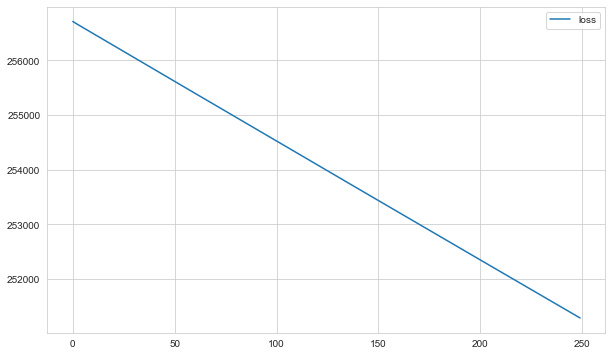

In [87]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

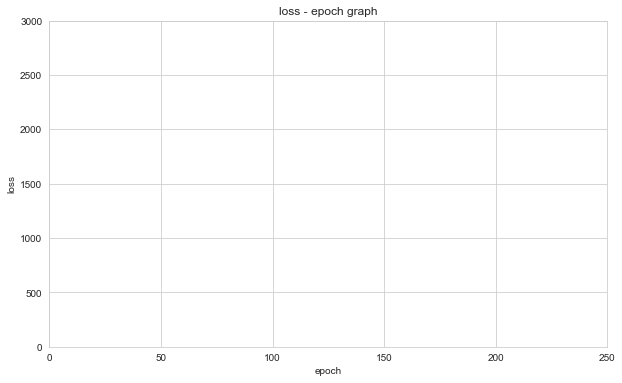

In [88]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

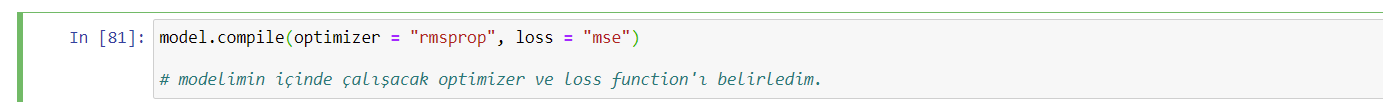

In [90]:
model.evaluate(X_train, y_train, verbose=0)

# modelin içerisine train setimizi veriyoruz ve skor alıyoruz. 
# Bu skor; compile a tanımladığımız loss değerimiz. (yukarda gördüğün gibi)

251277.71875

In [91]:
model.evaluate(X_test, y_test, verbose=0)

# teğer test setini soksaydım bu loss değerini verecekti.

253687.84375

In [92]:
y_pred = model.predict(X_test)

In [93]:
explained_variance_score(y_test, y_pred)

0.0

In [94]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
294,443.397,5.506
152,480.877,5.506
262,722.264,5.506
142,571.706,5.506
220,466.004,5.506
148,564.672,5.506
191,493.570,5.506
287,383.934,5.506
274,505.747,5.506
56,624.993,5.506


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

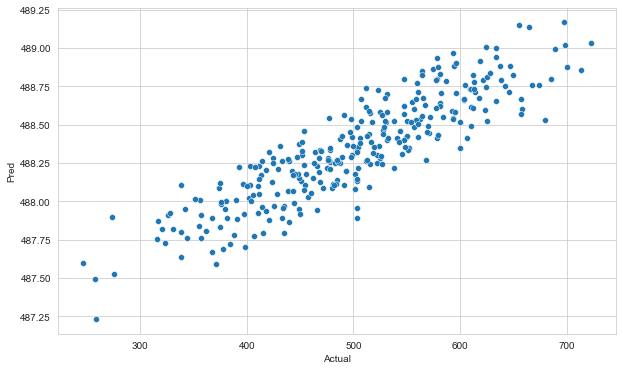

In [44]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [52]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [53]:
eval_metric(y_test, y_pred)

r2_score: 0.9971088978101367 
mae: 4.038566366076537 
mse: 25.41866200122191 
rmse: 5.0416923747112845


## Final Model and Model Deployment

In [97]:
scaler = MinMaxScaler().fit(X)

In [98]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [99]:
X_scaled = scaler.transform(X)

In [100]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 838us/step - loss: 257468.9375
Epoch 2/250
32/32 [==============================] - 0s 871us/step - loss: 257390.9219
Epoch 3/250
32/32 [==============================] - 0s 871us/step - loss: 257331.5469
Epoch 4/250
32/32 [==============================] - 0s 774us/step - loss: 257257.1094
Epoch 5/250
32/32 [==============================] - 0s 742us/step - loss: 257162.4531
Epoch 6/250
32/32 [==============================] - 0s 871us/step - loss: 257043.2500
Epoch 7/250
32/32 [==============================] - 0s 935us/step - loss: 256894.7344
Epoch 8/250
32/32 [==============================] - 0s 871us/step - loss: 256713.5781
Epoch 9/250
32/32 [==============================] - 0s 968us/step - loss: 256495.4062
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 256241.0938
Epoch 11/250
32/32 [==============================] - 0s 871us/step - loss: 255943.1875
Epoch 12/250
32/32 [=======================

32/32 [==============================] - 0s 806us/step - loss: 1251.9952
Epoch 96/250
32/32 [==============================] - 0s 774us/step - loss: 1219.3116
Epoch 97/250
32/32 [==============================] - 0s 806us/step - loss: 1189.4287
Epoch 98/250
32/32 [==============================] - 0s 839us/step - loss: 1159.4415
Epoch 99/250
32/32 [==============================] - 0s 839us/step - loss: 1127.8079
Epoch 100/250
32/32 [==============================] - 0s 935us/step - loss: 1098.8420
Epoch 101/250
32/32 [==============================] - 0s 902us/step - loss: 1067.3761
Epoch 102/250
32/32 [==============================] - 0s 871us/step - loss: 1037.6976
Epoch 103/250
32/32 [==============================] - 0s 774us/step - loss: 1007.1853
Epoch 104/250
32/32 [==============================] - 0s 774us/step - loss: 978.4915
Epoch 105/250
32/32 [==============================] - 0s 871us/step - loss: 949.1110
Epoch 106/250
32/32 [==============================] - 0s 871us

Epoch 191/250
32/32 [==============================] - 0s 774us/step - loss: 24.6616
Epoch 192/250
32/32 [==============================] - 0s 811us/step - loss: 24.6828
Epoch 193/250
32/32 [==============================] - 0s 821us/step - loss: 24.4847
Epoch 194/250
32/32 [==============================] - 0s 774us/step - loss: 24.6349
Epoch 195/250
32/32 [==============================] - 0s 774us/step - loss: 24.5203
Epoch 196/250
32/32 [==============================] - 0s 806us/step - loss: 24.5457
Epoch 197/250
32/32 [==============================] - 0s 935us/step - loss: 24.3602
Epoch 198/250
32/32 [==============================] - 0s 806us/step - loss: 24.6681
Epoch 199/250
32/32 [==============================] - 0s 903us/step - loss: 24.4373
Epoch 200/250
32/32 [==============================] - 0s 903us/step - loss: 24.3110
Epoch 201/250
32/32 [==============================] - 0s 903us/step - loss: 24.5095
Epoch 202/250
32/32 [==============================] - 0s 806us/s

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [102]:
model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [103]:
from tensorflow.keras.models import load_model

In [104]:
model_fake_reg = load_model('model_fake_reg.h5')

#  load_model: save ettiğimiz modeli başka bir yerde çağırıp kullanmak için

In [105]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [106]:
sample = [[998, 1000]]

In [107]:
sample_scaled = scaler_fake_reg.transform(sample)

In [108]:
model_fake_reg.predict(sample_scaled)

array([[5.505875]], dtype=float32)

## Prediction-2

In [109]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [110]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [111]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [113]:
model_fake_reg.predict(sample_scaled)

array([[5.505875 ],
       [5.505875 ],
       [5.505875 ],
       [5.505875 ],
       [5.4991803]], dtype=float32)